In [125]:
#kmean 거리기반이기에 실제 특성을 파악 hard -> 문제를 보완하기 위해 밀도기반 군집회
#동일집단 내 데이터는 서로 근접하게 분포할 것이다고 가정.
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/공빅데_대전_87조/코드 /New_data_1.csv',sep = ',',encoding = 'UTF-8')
data1 = data.iloc[:,2:]
data1

,bus_all,old_all,taxi_all,ratio
0,275685,124120,106389,13791.111110
1,611832,205895,152721,13726.333330
2,538031,138873,67136,6943.650000
3,595970,76728,62973,5902.153846
4,230806,55275,33026,3685.000000
...,...,...,...,...
171,71465,0,8892,0.000000
172,1399,0,152,0.000000
173,415,0,15,0.000000
174,0,0,0,0.000000


In [126]:
data1.columns

Index(['bus_all', 'old_all', 'taxi_all', 'ratio'], dtype='object')

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [158]:
x = data[['bus_stop_num', 'bus_all', 'old_all', 'taxi_all','ratio']]
from sklearn.preprocessing import StandardScaler
x1 = StandardScaler().fit_transform(x)

dbscan = DBSCAN(eps = 0.2, min_samples = 4)
# eps 는 이웃을 정의하기 위한 거리
#min_samplessms특정지점이 중심점으로 간주된 최소 이웃 수

pred = pd.DataFrame(dbscan.fit_predict(x1))
pred.columns = ['predict']
r = pd.concat([x,pred],axis = 1)
print(r)

     bus_stop_num  bus_all  old_all  taxi_all         ratio  predict
0               9   275685   124120    106389  13791.111110       -1
1              15   611832   205895    152721  13726.333330       -1
2              20   538031   138873     67136   6943.650000       -1
3              13   595970    76728     62973   5902.153846       -1
4              15   230806    55275     33026   3685.000000       -1
..            ...      ...      ...       ...           ...      ...
171             5    71465        0      8892      0.000000        0
172             5     1399        0       152      0.000000        0
173             4      415        0        15      0.000000        0
174             0        0        0         0      0.000000        0
175             0        0        0         0      0.000000        0

[176 rows x 6 columns]


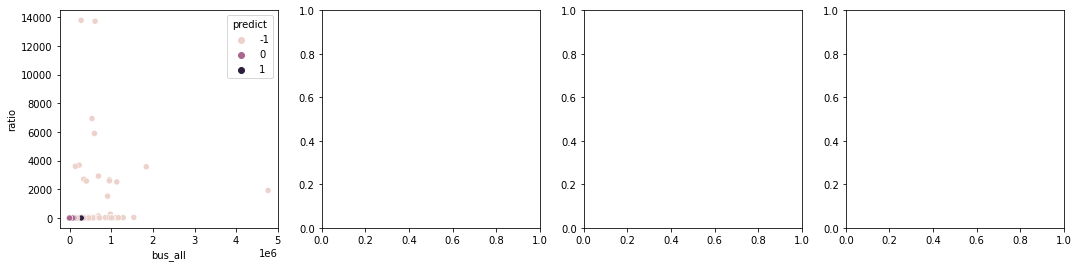

In [159]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.pairplot(r,hue = 'predict')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18,4))
sns.scatterplot(x="bus_all", y="ratio", data=r,hue='predict',ax=ax[0])
# set_xlim(0,750000) # 스케일이 너무 커서 스케일 조정 
# ax[0].set_ylim(0,15000)

In [162]:
pd.DataFrame(x[dbscan.fit_predict(x)== 1])

,bus_stop_num,bus_all,old_all,taxi_all,ratio


In [56]:
bx.iloc[dbscan.fit_predict(x)== -1,:].describe()

,bus_stop_num,bus_all,old_all,taxi_all,ratio
count,173.000000,1.730000e+02,173.000000,173.000000,173.000000
mean,13.682081,2.709837e+05,9660.942197,46459.884393,653.305327
std,10.237731,4.842543e+05,34275.263222,85309.562803,3515.010300
min,0.000000,0.000000e+00,0.000000,3.000000,0.000000
25%,7.000000,4.522000e+03,4.000000,237.000000,0.500000
50%,12.000000,9.163200e+04,56.000000,14166.000000,4.666667
75%,19.000000,3.719280e+05,242.000000,65992.000000,17.333333
max,72.000000,4.767342e+06,243650.000000,766681.000000,40608.333330


In [65]:
x.iloc[dbscan.fit_predict(x)== 0,:].describe()

,bus_stop_num,bus_all,old_all,taxi_all,ratio
count,4.0,4.0,4.0,4.0,4.0
mean,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


K-Means 군집 추가 분석


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state = 21)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [ ]:
new_labels = pd.DataFrame(km.labels_)
new_labels.columns = ['predict']

In [ ]:
r2 = pd.concat([x,new_labels],axis = 1)

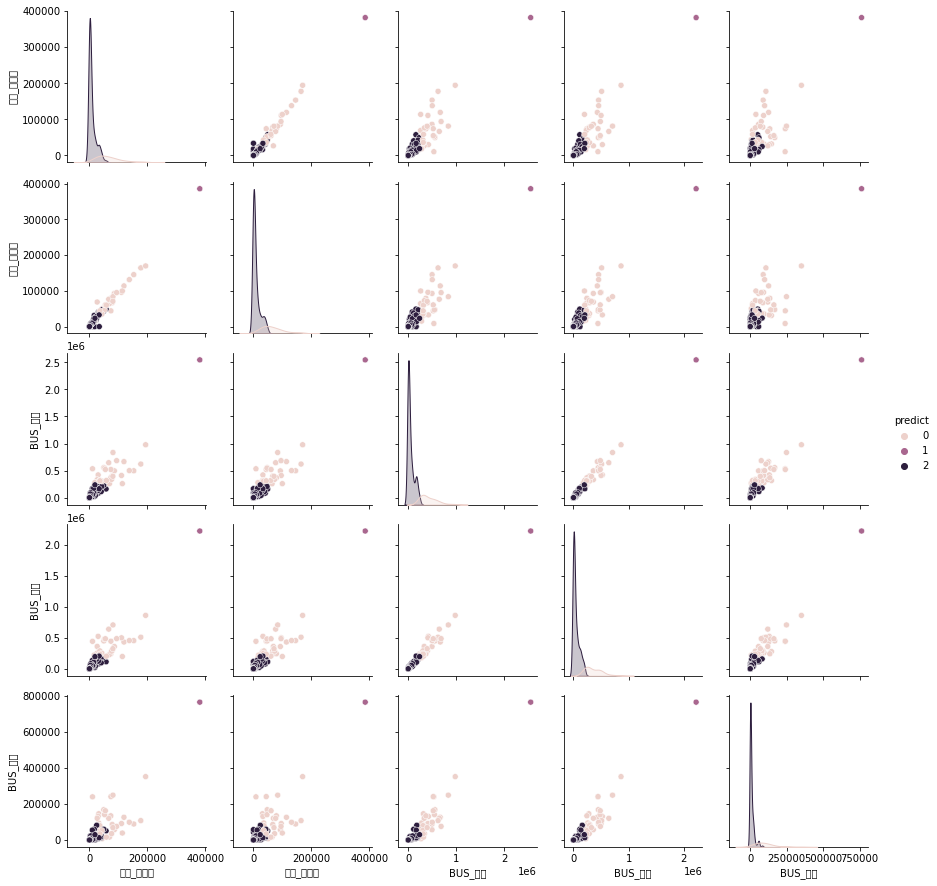

In [ ]:
sns.pairplot(r2,hue = 'predict')
plt.show()